<a href="https://colab.research.google.com/github/ThiagoRberto/Exerc-cios-URI/blob/master/AndreEiki_ThiagoRoberto_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange> Módulo Aprendizagem:

> ## <font color=#EE9A4D> Obtenção dos Dados:



In [ ]:
from google.colab import drive # Conectando ao Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import zipfile
import numpy as np

In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Data/House_Sale/House_Sale.zip')  # aloca o arquivo zip

data = pd.read_csv(zf.open('kc_house_data.csv')) # abre o arquivo CSV 'kc_house_data.csv' presente dentro do ZIP
datacopy = data.copy()

In [ ]:
data.head() # Imprime os dados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


> ## <font color=#EE9A4D> Análise de Correlação e Exclusão de Dados Não Importantes:

<ipython-input-7-73cb6e68dc8d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr  = data.corr() # Calcula a correlação presente entre todos os elementos contidos na matriz de dados


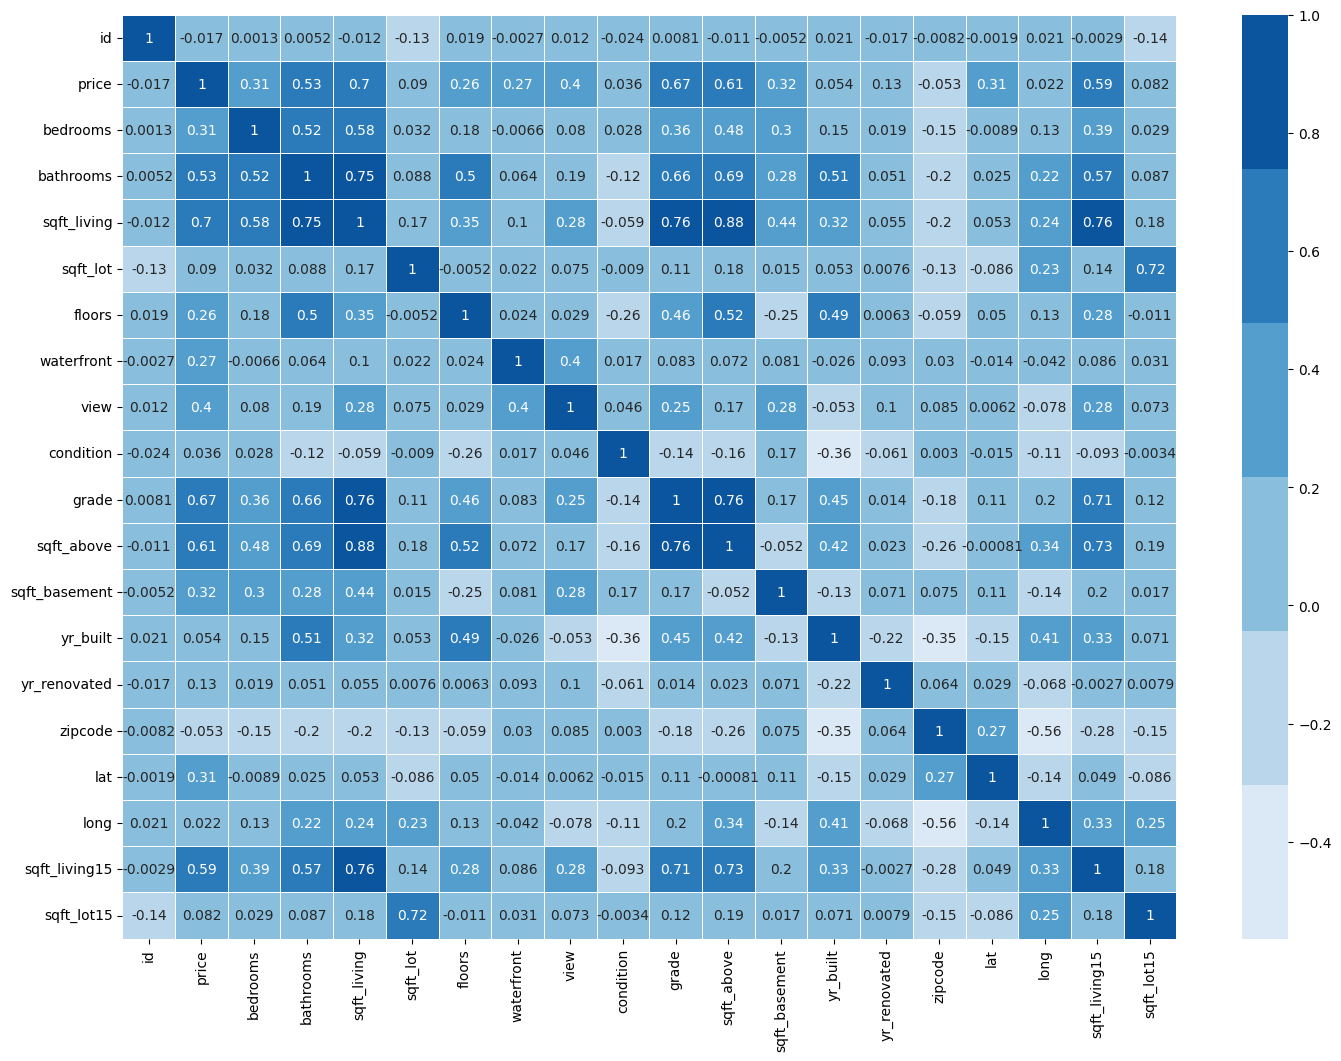

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr  = data.corr() # Calcula a correlação presente entre todos os elementos contidos na matriz de dados

f, ax = plt.subplots(figsize=(17, 12))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [ ]:
# ID, date, lat e long são colunas visivelmente desnecessárias para o treinamente dos modelos
# Zipcode e Condition possuem uma baixa correlação com todos os outros elementos, por isso são da base de dados
data = data.drop(['id', 'date', 'lat', 'long', 'zipcode', 'condition'], axis=1) # Remove todas as colunas desnecessárias

> ## <font color=#EE9A4D> Tratando valores 'Not a Number'

In [ ]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# como NaN sempre nos causa problemas, (1) retiramos esse atributo ou (2) preenchemos com valores médios
np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [ ]:
data = data.drop([10, 17])
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

> ## <font color=#EE9A4D> Separando os dados

In [ ]:
from sklearn.model_selection import train_test_split # separa os dados em treinamento e teste de forma aleatória

y = data['price']
X = data.iloc[:, 1:17]
print(y.shape)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # Separando 20% do conjunto para teste

(21611,)
(21611, 14)


> ## <font color=#EE9A4D> Árvore de Decisão:

In [ ]:
from sklearn import tree
# Criando uma árvore de decisão para regressão, com profundidade 5

clf = tree.DecisionTreeRegressor(random_state=0,max_depth=5)
clf = clf.fit(X_train, y_train)

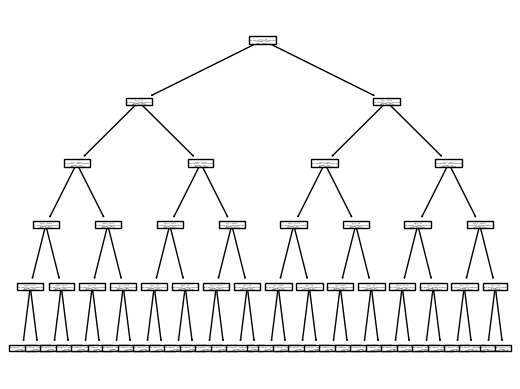

In [ ]:
tree.plot_tree(clf) # Plot da árvore
plt.show()

In [ ]:
dt_predicao = clf.predict(X_test)

Decision Tree
MAE: 140910.5573310066
MSE: 48423791488.058525
RMSE: 220054.06492055202
Coefficient of determination: 0.68


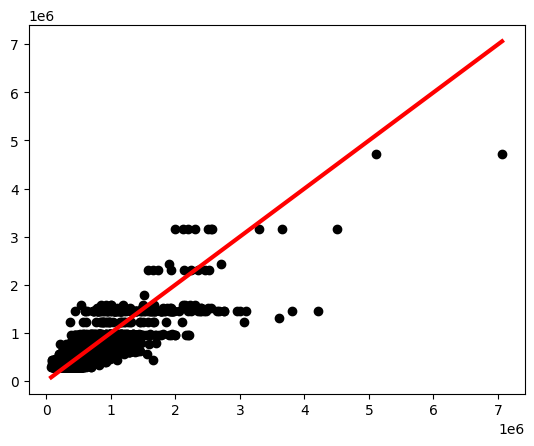

In [ ]:
from sklearn import metrics
# Plotando 

print("Decision Tree")
print('MAE:', metrics.mean_absolute_error(y_test, dt_predicao))
print('MSE:', metrics.mean_squared_error(y_test, dt_predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_predicao)))

print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, dt_predicao))

plt.scatter(y_test, dt_predicao, color="black")
plt.plot(np.arange(np.min(y_test),np.max(y_test)),
         np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

plt.show()

> ## <font color=#EE9A4D> Modelo Linear

Coefficients: 
 [-4.11167972e+04  5.05972456e+04  1.07614377e+02  1.99367485e-02
  2.39212122e+04  5.16656137e+05  4.41196015e+04  1.18560002e+05
  4.94975559e+01  5.81168212e+01 -3.75215449e+03  2.77075916e+00
  2.83852469e+01 -5.66153102e-01]
MAE: 142166.15043139146
MSE: 49849510253.6566
RMSE: 223270.03886248733
Coefficient of determination: 0.67


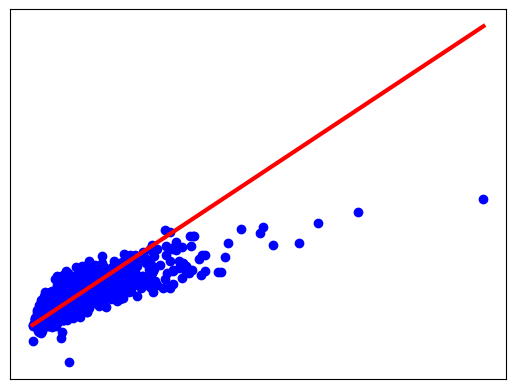

In [ ]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
regr_predicao = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

print('MAE:', metrics.mean_absolute_error(y_test, regr_predicao))
print('MSE:', metrics.mean_squared_error(y_test, regr_predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, regr_predicao)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, regr_predicao))

# Plot outputs
plt.scatter(y_test, regr_predicao, color="blue")
plt.plot(np.arange(np.min(y_test),np.max(y_test)),np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

> ## <font color=#EE9A4D> Rede Neural

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, regularizers
from tensorflow.keras.layers import Dense, Dropout, GaussianNoise
from tensorflow.keras.constraints import max_norm
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import mean_absolute_percentage_error

input_shape = (14, )
model = Sequential([
Dense(1000, input_shape=input_shape, activation='relu', kernel_regularizer=regularizers.L2(0.01)),
GaussianNoise(0.2), # Ruído
Dropout(0.2), # Poda 
Dense(1000, activation = 'relu', kernel_regularizer=regularizers.L2(0.01)), #  Regularização Ativa
Dropout(0.2), # Poda 
Dense(1000, activation = 'relu', kernel_constraint=max_norm(2.)), # Restrição de Pesos
Dropout(0.2),
Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.01)), #  Regularização Ativa
Dropout(0.2), # Poda 
Dense(8, activation = 'relu', kernel_regularizer=regularizers.L2(0.01)), #  Regularização Ativa
Dropout(0.2), # Poda 
Dense(1, activation='linear')
])

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [26]:
history = model.fit(X, y, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
rna_preds = model.predict(X_test)

data['new_price'] = model.predict(X)

print('MAE:', metrics.mean_absolute_error(y_test, rna_preds))
print('MSE:', metrics.mean_squared_error(y_test, rna_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rna_preds)))
print('MAPE:', mean_absolute_percentage_error(y_test, rna_preds))

Epoch 1/10
541/541 [==============================] - 5s 10ms/step - loss: 176735.0469 - mean_squared_error: 71864762368.0000 - val_loss: 155398.8750 - val_mean_squared_error: 63644340224.0000
Epoch 2/10
541/541 [==============================] - 7s 13ms/step - loss: 177830.5625 - mean_squared_error: 73846267904.0000 - val_loss: 152168.4531 - val_mean_squared_error: 58309918720.0000
Epoch 3/10
541/541 [==============================] - 4s 6ms/step - loss: 178248.2188 - mean_squared_error: 73908879360.0000 - val_loss: 154304.4062 - val_mean_squared_error: 61133045760.0000
Epoch 4/10
541/541 [==============================] - 3s 5ms/step - loss: 176984.0156 - mean_squared_error: 72170545152.0000 - val_loss: 153492.8906 - val_mean_squared_error: 59538550784.0000
Epoch 5/10
541/541 [==============================] - 3s 5ms/step - loss: 177028.5625 - mean_squared_error: 72778211328.0000 - val_loss: 152154.0000 - val_mean_squared_error: 61489836032.0000
Epoch 6/10
541/541 [==================

In [27]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,new_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180.0,0,1955,0,1340,5650,300677.93750
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170.0,400,1951,1991,1690,7639,505889.84375
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770.0,0,1933,0,2720,8062,396540.37500
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050.0,910,1965,0,1360,5000,438656.28125
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680.0,0,1987,0,1800,7503,306043.28125


> ## <font color=#EE9A4D> Análise de Resultados

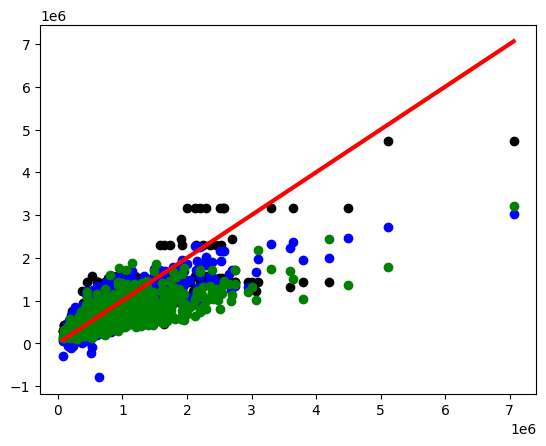

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(y_test, dt_predicao,  color="black")
ax.scatter(y_test, regr_predicao, color="blue")
ax.scatter(y_test, rna_preds[:, 0].flatten(), color='green')
ax.plot(np.arange(np.min(y_test),np.max(y_test)),np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

ax.figure.show()

In [ ]:
dt_diff = np.absolute(y_test - dt_predicao)
regr_diff = np.absolute(y_test - regr_predicao)
rna_diff = np.absolute(y_test - rna_preds.flatten())

print("Min dt_diff: ", np.min(dt_diff)/100000, "Max dt_diff", np.max(dt_diff)/100000)
print("Min regr_diff: ", np.min(regr_diff), "Max regr_diff", np.max(regr_diff))
print("Min rna_diff: ", np.min(rna_diff), "Max rna_diff", np.max(rna_diff))

Min dt_diff:  0.0022743343653250487 Max dt_diff 27.621773221649487
Min regr_diff:  71.06024342775345 Max regr_diff 4030415.290881232
Min rna_diff:  2.15625 Max rna_diff 3840784.75


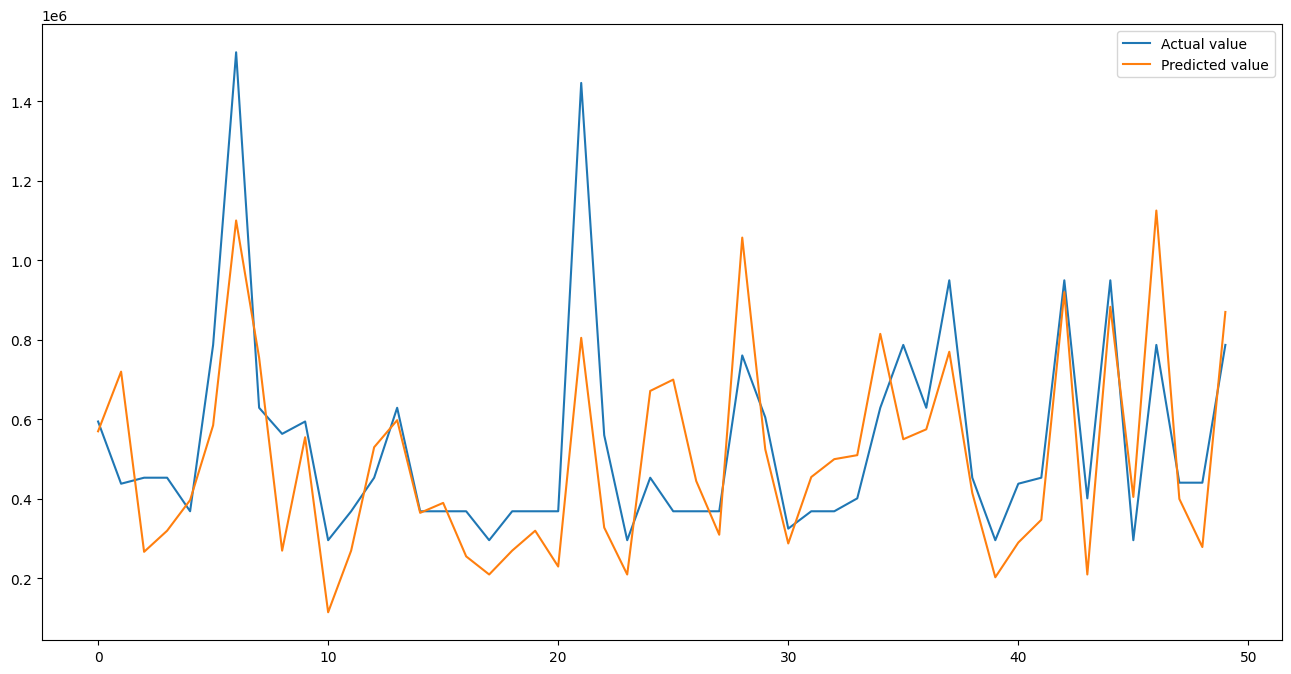

In [ ]:
# criando um dataframe com y_test e dt_predicao
dt_outcomes = pd.DataFrame({'Predicted value':dt_predicao, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
dt_outcomes = dt_outcomes.reset_index()
dt_outcomes = dt_outcomes.drop(['index'],axis=1)
plt.plot(dt_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

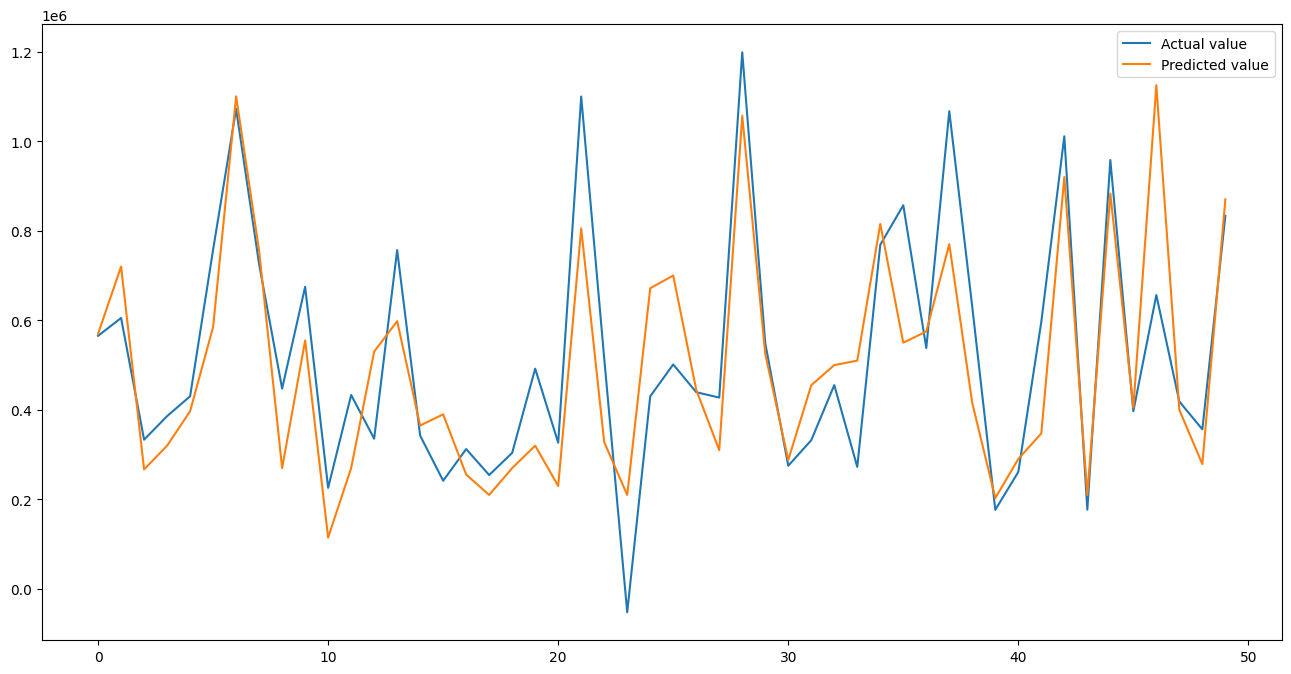

In [ ]:
# criando um dataframe com y_test e regr_predicao
regr_outcomes = pd.DataFrame({'Predicted value':regr_predicao, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
regr_outcomes = regr_outcomes.reset_index()
regr_outcomes = regr_outcomes.drop(['index'],axis=1)
plt.plot(regr_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

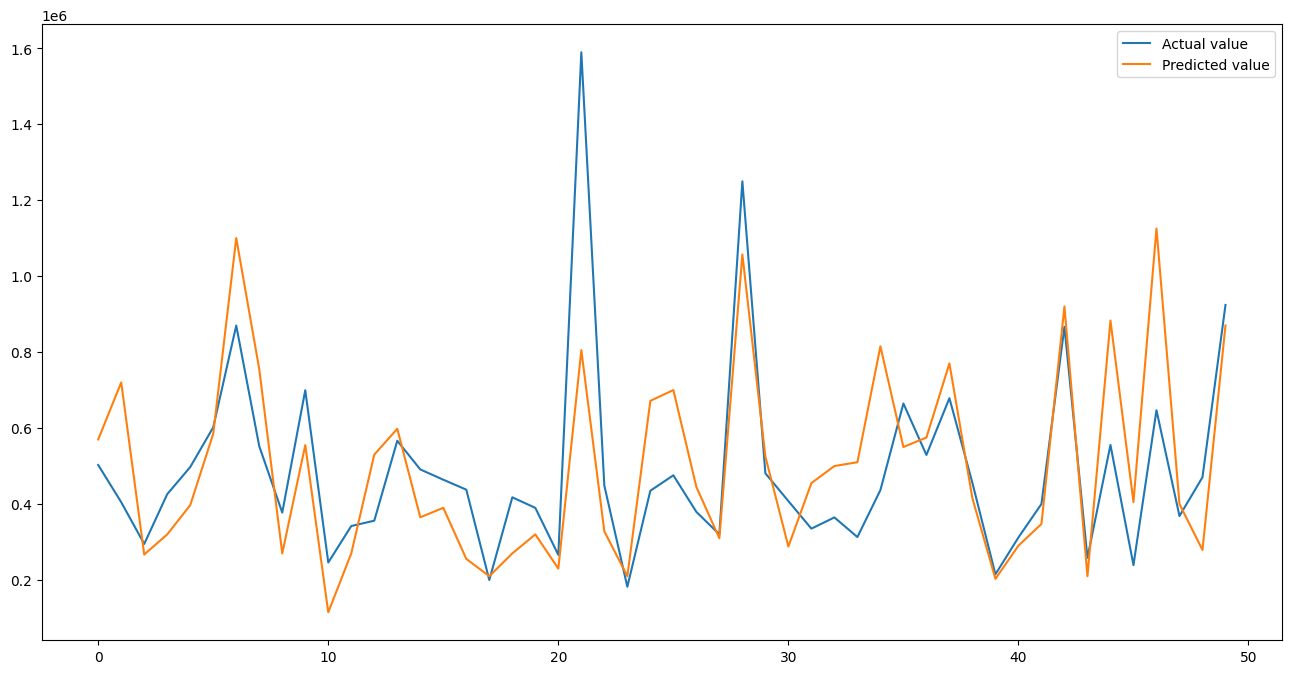

In [ ]:
# criando um dataframe com y_test e rna_predicao
rna_outcomes = pd.DataFrame({'Predicted value':list(rna_preds), 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
rna_outcomes = rna_outcomes.reset_index()
rna_outcomes = rna_outcomes.drop(['index'],axis=1)
plt.plot(rna_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

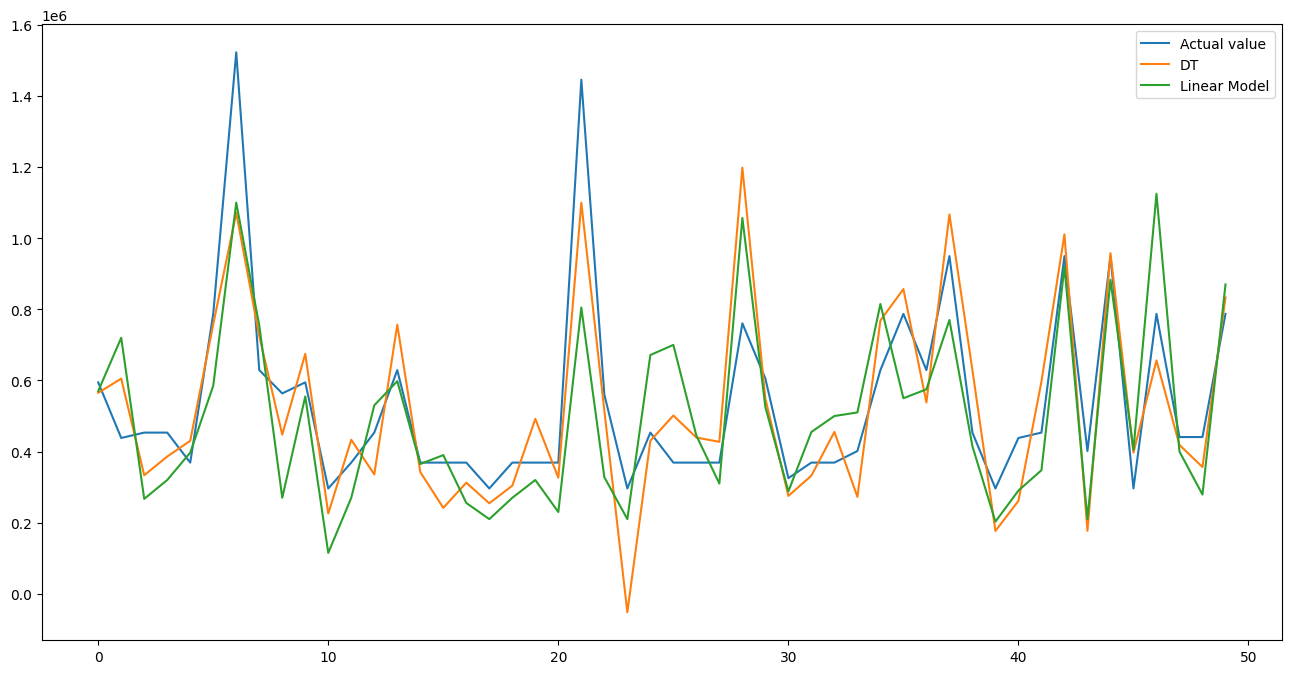

In [ ]:
# criando um dataframe com y_test, dt_predicao e regr_predicao
model_outcomes = pd.DataFrame({'DT':dt_predicao, 'Linear Model':regr_predicao, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
model_outcomes = model_outcomes.reset_index()
model_outcomes = model_outcomes.drop(['index'],axis=1)
plt.plot(model_outcomes[:50])
plt.legend(['Actual value','DT','Linear Model'])

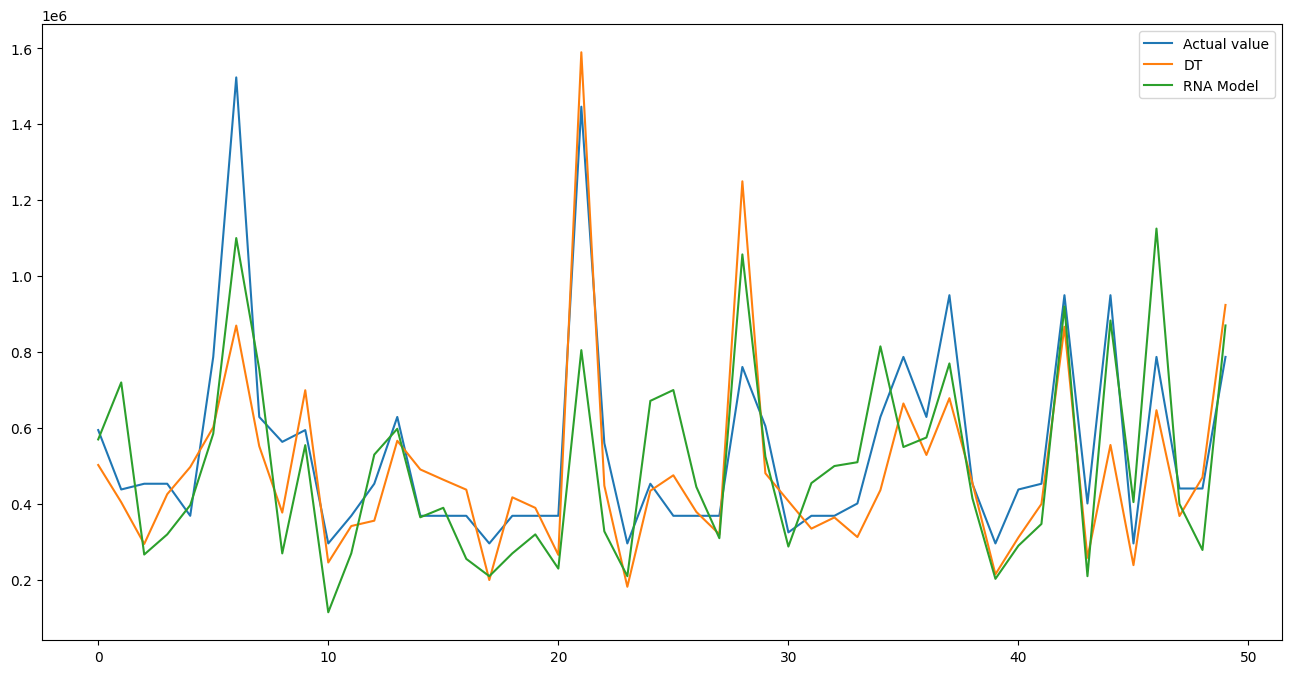

In [ ]:
# criando um dataframe com y_test, dt_predicao e rna_predicao
model_outcomes = pd.DataFrame({'DT':dt_predicao, 'RNA Model':rna_preds.flatten(), 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
model_outcomes = model_outcomes.reset_index()
model_outcomes = model_outcomes.drop(['index'],axis=1)
plt.plot(model_outcomes[:50])
plt.legend(['Actual value','DT', 'RNA Model'])

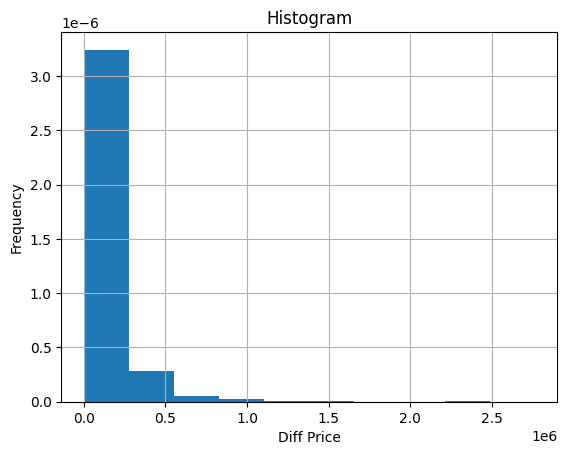

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(dt_diff, density=True)
plt.xlabel('Diff Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

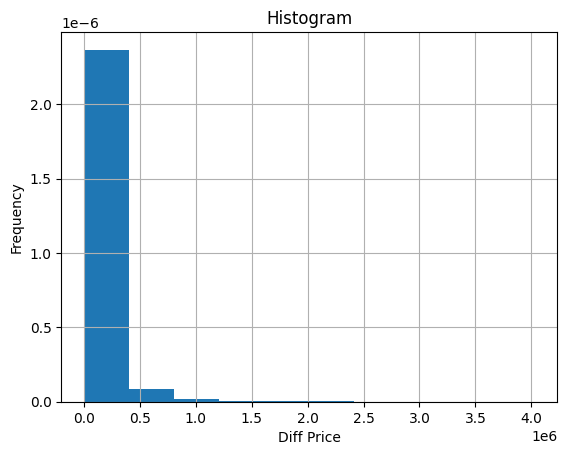

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

regr_diff.values.sort()
values = regr_diff.values
n, bins, patches = plt.hist(values, density=True)
plt.xlabel('Diff Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

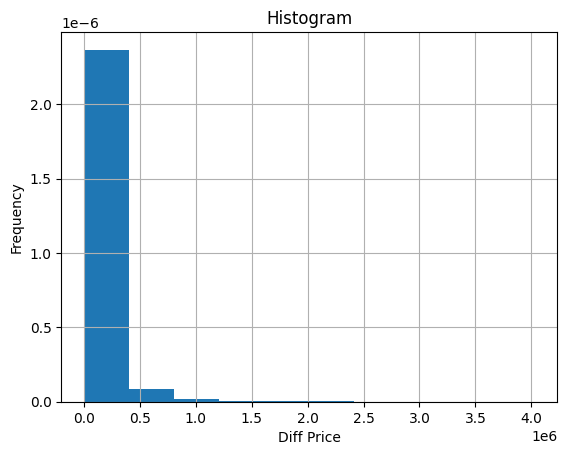

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rna_diff.values.sort()
values = regr_diff.values
n, bins, patches = plt.hist(values, density=True)
plt.xlabel('Diff Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [ ]:
from sklearn import metrics 

line1 = [metrics.mean_absolute_error(y_test, dt_predicao), metrics.mean_absolute_error(y_test, regr_predicao), metrics.mean_absolute_error(y_test, rna_preds)]
line2 = [metrics.mean_squared_error(y_test, dt_predicao), metrics.mean_squared_error(y_test, regr_predicao), metrics.mean_squared_error(y_test, rna_preds)]
line3 = [np.sqrt(metrics.mean_squared_error(y_test, dt_predicao)), np.sqrt(metrics.mean_squared_error(y_test, regr_predicao)), np.sqrt(metrics.mean_squared_error(y_test, rna_preds))]
line4 = [mean_absolute_percentage_error(y_test, dt_predicao), mean_absolute_percentage_error(y_test, regr_predicao), mean_absolute_percentage_error(y_test, rna_preds)]                                                                                                                                                                                                                                                                          

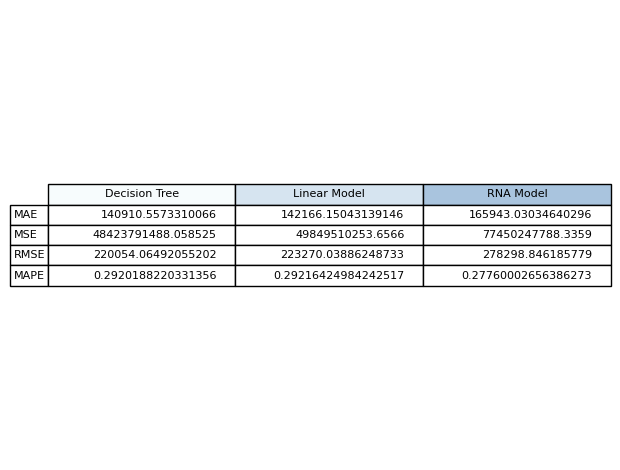

In [ ]:
fig, ax = plt.subplots()
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4))

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=[line1, line2, line3, line4], 
         rowLabels = ['MAE', 'MSE', 'RMSE', 'MAPE'], 
         colLabels = ['Decision Tree', 'Linear Model', 'RNA Model'], 
         colColours = colors, 
         loc='center')

fig.tight_layout()

plt.show()

> ## <font color=#EE9A4D> 5-Fold Crossvalidation

In [ ]:
# Crossvalidation protocol

import numpy as np
from sklearn.model_selection import KFold

y = data['price']
X = data.iloc[:, 1:17]

kf = KFold(n_splits=5,shuffle=True) # definir quantas partes
kf.get_n_splits(X)

print(kf)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

KFold(n_splits=5, random_state=None, shuffle=True)
Fold 0:
  Train: index=[    0     1     3 ... 21608 21609 21610]
  Test:  index=[    2     5    14 ... 21587 21591 21604]
Fold 1:
  Train: index=[    0     1     2 ... 21608 21609 21610]
  Test:  index=[    3     9    11 ... 21595 21599 21600]
Fold 2:
  Train: index=[    0     1     2 ... 21608 21609 21610]
  Test:  index=[   13    16    17 ... 21597 21605 21607]
Fold 3:
  Train: index=[    0     2     3 ... 21607 21608 21610]
  Test:  index=[    1     4    10 ... 21601 21603 21609]
Fold 4:
  Train: index=[    1     2     3 ... 21605 21607 21609]
  Test:  index=[    0     6     7 ... 21606 21608 21610]


In [ ]:
X_train = X.values[train_index]
print("X_train: ",X_train.shape)
y_train = y.values[train_index]
print("y_train: ",y_train.shape)

X_test = X.values[test_index]
print("X_test: ",X_test.shape)
y_test = y.values[test_index]
print("y_test: ",y_test.shape)

X_train:  (17289, 14)
y_train:  (17289,)
X_test:  (4322, 14)
y_test:  (4322,)


In [ ]:
from sklearn import metrics

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"\nFold {i}:")

    X_train = X.values[train_index]
    y_train = y.values[train_index]
    
    X_test = X.values[test_index]
    y_test = y.values[test_index]

    history = model.fit(X, y, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
    rna_preds = model.predict(X_test, verbose=0)

    print('MAE:', metrics.mean_absolute_error(y_test, rna_preds))
    print('MSE:', metrics.mean_squared_error(y_test, rna_preds))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rna_preds)))
    print('MAPA:', mean_absolute_percentage_error(y_test, rna_preds))


Fold 0:
Epoch 1/10
541/541 [==============================] - 3s 5ms/step - loss: 194561.0312 - mean_squared_error: 85423898624.0000 - val_loss: 157821.3750 - val_mean_squared_error: 65635340288.0000
Epoch 2/10
541/541 [==============================] - 4s 7ms/step - loss: 195711.7500 - mean_squared_error: 89337323520.0000 - val_loss: 168298.4219 - val_mean_squared_error: 74195468288.0000
Epoch 3/10
541/541 [==============================] - 3s 5ms/step - loss: 195395.5469 - mean_squared_error: 86736838656.0000 - val_loss: 163125.8906 - val_mean_squared_error: 66764873728.0000
Epoch 4/10
541/541 [==============================] - 3s 5ms/step - loss: 193846.1562 - mean_squared_error: 85632540672.0000 - val_loss: 162679.2344 - val_mean_squared_error: 70305726464.0000
Epoch 5/10
541/541 [==============================] - 3s 5ms/step - loss: 193127.8281 - mean_squared_error: 84385800192.0000 - val_loss: 163307.3438 - val_mean_squared_error: 68965187584.0000
Epoch 6/10
541/541 [===========

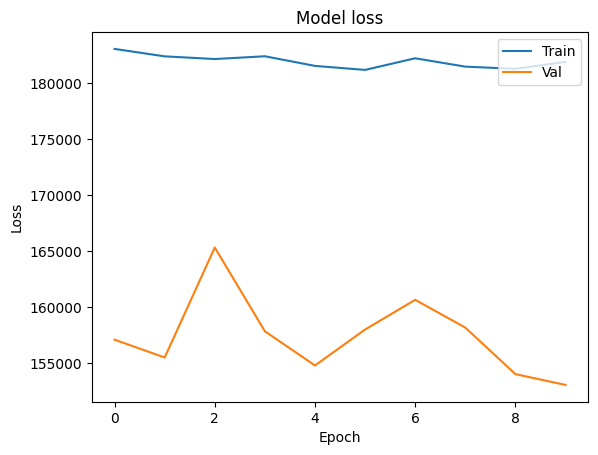

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

> ## <font color=#EE9A4D> Salvando os 5 Melhores Modelos

In [ ]:
torch.save

# <font color=orange> Módulo Interface:

> ## <font color=#EE9A4D> Gerando Mapa:

In [38]:
import folium 

map = folium.Map(location=[47.608013, -122.257], zoom_start=8, tiles = 'stamenterrain')

In [39]:
map

> ## <font color=#EE9A4D> Heatmap:

In [40]:
from folium.plugins import HeatMap

HeatMap(datacopy.iloc[:, [-4, -3, 2]], min_opacity = 0.2, name = 'heatmap').add_to(map)
map

> ## <font color=#EE9A4D> Marcando Washington:

In [41]:
borderStyle = {
    'color': 'red',
    'weight': 2,
}

folium.GeoJson('/content/drive/MyDrive/Data/House_Sale/us-states.json', 
               name = 'Washington',
               style_function=lambda x: borderStyle).add_to(map)


In [42]:
map

In [43]:
folium.LayerControl().add_to(map)
map

> ## <font color=#EE9A4D> Plotando casas:

In [44]:
datacopy['new_price'] = data['new_price']

In [45]:
datacopy.price.quantile([0.2, 0.4, 0.6, 0.8])

0.2    298470.0
0.4    399500.0
0.6    519000.0
0.8    700108.0
Name: price, dtype: float64

In [ ]:
i = 0
for index, row in datacopy.iterrows():
    popup = (folium.Html('<b>Price:</b> U$' + str(row['price']) + 
                        '<br><b>New Price:</b> U$' + str(row['new_price']) +
                        '<br><b>Bedrooms:</b> ' + str(row['bedrooms']) + 
                        '<br><b>Bathrooms:</b> ' + str(row['bathrooms']) +
                        '<br><b>Living Area:</b> ' + str(row['sqft_living']) + 'm²' +
                        '<br><b>Lot Area:</b> ' + str(row['sqft_lot']) +  'm²' +
                        '<br><b>Floors:</b> ' + str(row['floors']) +
                        '<br><b>Waterfront:</b> ' + str(row['waterfront']) +
                        '<br><b>Condition:</b> ' + str(row['condition']) +
                        '<br><b>Grade:</b> ' + str(row['grade']) +
                        '<br><b>Above:</b> ' + str(row['sqft_above']) +  'm²' +
                        '<br><b>Basement:</b> ' + str(row['sqft_basement']) +  'm²' +
                        '<br><b>Year Built:</b> ' + str(row['yr_built']) + 
                        '<br><b>Year Renovated:</b> ' + str(row['yr_renovated']) +
                        '<br><b>Zipcode:</b> ' + str(row['zipcode']), script=True))

    if (row['price'] >= 645000.0):
      folium.Marker(location = [row['lat'], row['long']],
                  icon = folium.Icon(icon = 'glyphicon-home', color='darkred'),
                  tooltip = 'ID: ' + str(row['id']),
                  popup=folium.Popup(popup, max_width=500)).add_to(map)
    elif (row['price'] < 645000.0 and row['price'] >= 450000.0):
      folium.Marker(location = [row['lat'], row['long']],
                  icon = folium.Icon(icon = 'glyphicon-home', color='orange'),
                  tooltip = 'ID: ' + str(row['id']),
                  popup=folium.Popup(popup, max_width=500)).add_to(map)
    else:
      folium.Marker(location = [row['lat'], row['long']],
                  icon = folium.Icon(icon = 'glyphicon-home', color='green'),
                  tooltip = 'ID: ' + str(row['id']),
                  popup=folium.Popup(popup, max_width=500)).add_to(map)
    i += 1
    if i > 500:
      break
map

> ## <font color=#EE9A4D> Salvando Mapa:

In [47]:
map.save('mapa.html')